### Lead Scoring Case Study

Problem Statement:

X Education, an online education company, faces a challenge with its lead conversion rate, which currently stands at 30%. To improve efficiency, they seek to identify "Hot Leads" with the highest potential to convert into paying customers. The company aims to build a model that assigns lead scores to prioritize leads likely to convert, ultimately targeting an 80% conversion rate.

Objective of the Case Study:

Develop a logistic regression model that assigns lead scores ranging from 0 to 100 to prioritize leads for the company.

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the data

leads = pd.read_csv("C:/Users/user/OneDrive/Desktop/Assignment Data/Leads.csv")

In [4]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.shape

(9240, 37)

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Data cleaning and preparation

Handling missing values

In [8]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
#Dropping 'Prospect ID' and 'Lead Number' columns as these are not data points

leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [10]:
leads.shape

(9240, 35)

In [11]:
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
A free copy of Mastering The

In [12]:
round(leads.isnull().sum()*100/len(leads),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

##### Top six columns have missing vaues which are more than 35%. Due to the impact on significance these columns are dropped

In [13]:
leads.drop(['Lead Quality', 'Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Profile Index','Asymmetrique Activity Score', 'Tags'], axis=1, inplace=True)



In [14]:
leads.shape

(9240, 29)

In [15]:
round(leads.isnull().sum()*100/len(leads),2).sort_values(ascending=False)
leads.isnull().sum().sort_values(ascending=False)

Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Lead Origin                                         0
Digital Advertisement                               0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations     

In [16]:
round(leads.isnull().sum()*100/len(leads),2).sort_values(ascending=False)

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Re

In [17]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


##### The cells with value select which means no option selected need to be highlighted as they also mean no value effectively.

In [18]:
for col in leads.columns:
    print(leads[col].astype('category').value_counts())
    print("=" * 40)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
0    5679
1    3561
Name: Converted, dtype: int64
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       7

In [19]:
# Option 'Select' is available in columns named 'City','Specialization','How did you hear about X Education' and'Lead Profile'

In [20]:
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [23]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [24]:
leads.drop(['Lead Profile','City', 'How did you hear about X Education'], axis=1, inplace=True)

In [25]:
leads.shape

(9240, 26)

In [26]:
for col in leads.columns:
    print(leads[col].astype('category').value_counts())
    print("=" * 40)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
0    5679
1    3561
Name: Converted, dtype: int64
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       7

The columns 'What matters most to you in choosing a course' and 'Country' have only one variable significant number of times hence these columns are dropped

In [27]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [29]:
leads.drop(['What matters most to you in choosing a course', 'Country'], axis=1, inplace=True)

In [30]:
leads.shape

(9240, 24)

In [31]:
leads.isnull().sum().sort_values(ascending=False)

What is your current occupation             2690
Specialization                              1438
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Lead Origin                                    0
Newspaper                                      0
A free copy of Mastering The Interview         0
I agree to pay the amount through cheque       0
Get updates on DM Content                      0
Update me on Supply Chain Content              0
Receive More Updates About Our Courses         0
Through Recommendations                        0
Digital Advertisement                          0
Magazine                                       0
X Education Forums                             0
Newspaper Article                              0
Search                                         0
Total Time Spent on Website                    0
Converted           

In [32]:
for col in leads.columns:
    print(leads[col].astype('category').value_counts())
    print("=" * 50)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
0    5679
1    3561
Name: Converted, dtype: int64
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       7

In [33]:
column_percentages = (leads == 'No').mean()
columns_with_high_no_percentage = column_percentages[column_percentages > 0.95]
column_names = columns_with_high_no_percentage.index
print(column_names)

Index(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')


In [34]:
leads.drop(column_names, axis=1, inplace=True)

In [35]:
leads.shape

(9240, 12)

In [36]:
leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [37]:
##replacing null values in What is your current occupation (2690) and Specialization (1438)

In [38]:
leads = leads.dropna(axis=0, subset=['What is your current occupation','Specialization'])

In [39]:
leads.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
Specialization                              0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [40]:
## Further clearing the null values

In [41]:
leads.dropna(how='any',axis=0, inplace=True) 

In [42]:
leads.isnull().sum().sort_values(ascending=False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [43]:
print(len(leads.index))
print((len(leads.index)/9240)*100)

6373
68.97186147186147


In [44]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [45]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


The final data set devoid of null values and values which can give skewed results is ready. 
We shall proceed with EDA next

### Exploratory Data Analysis

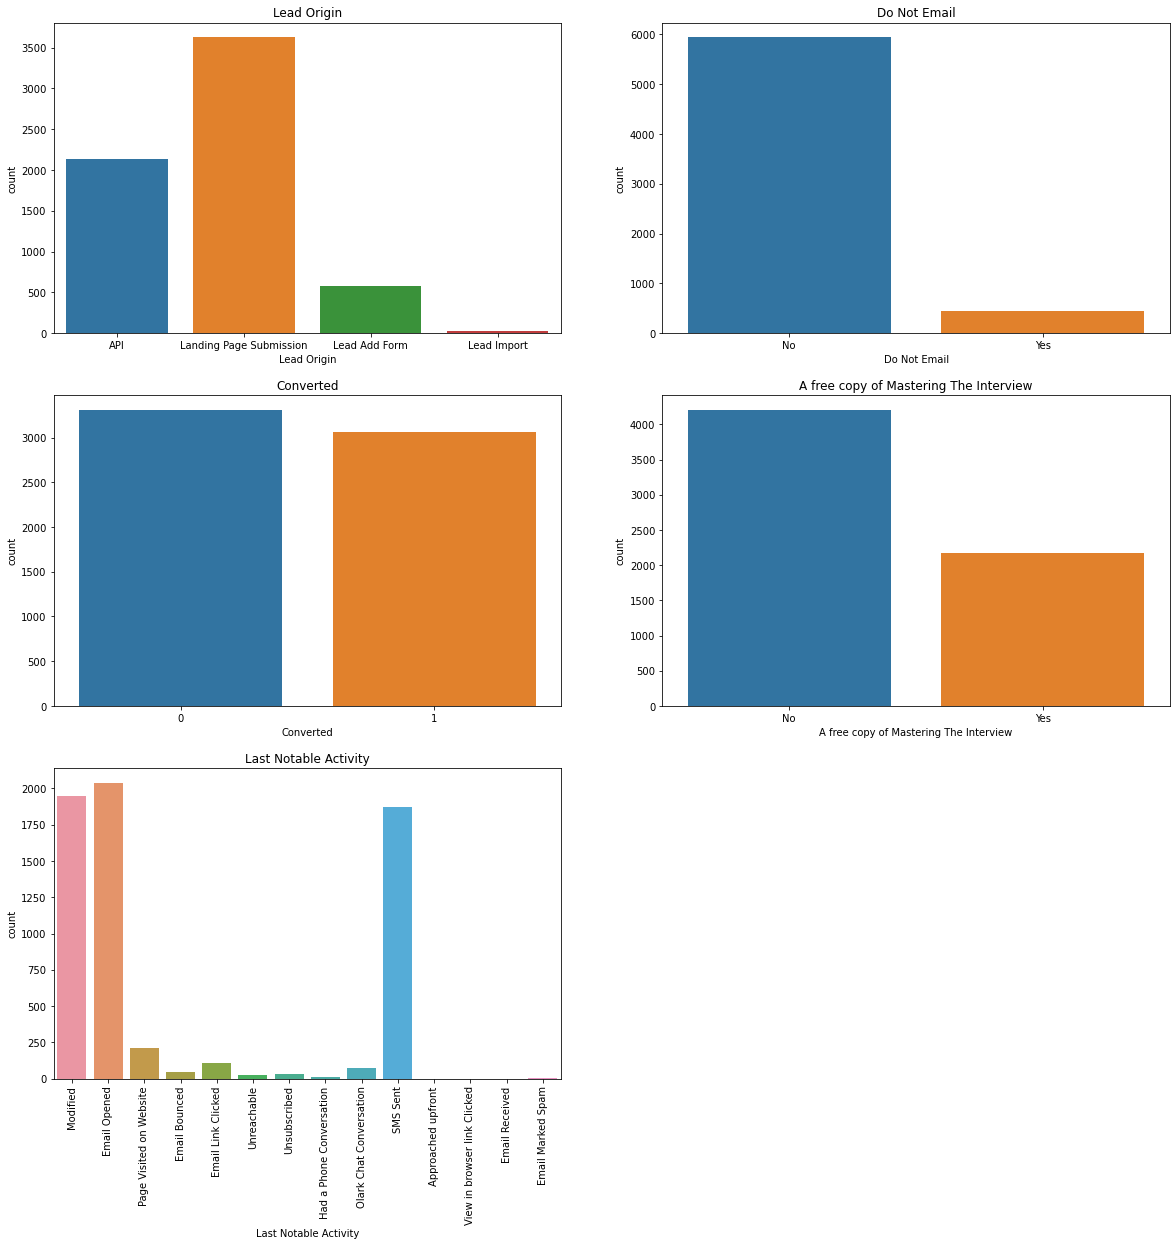

In [46]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leads['Converted'])
plt.title('Converted')

plt.subplot(6,2,4)
sns.countplot(leads['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,5)
sns.countplot(leads['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

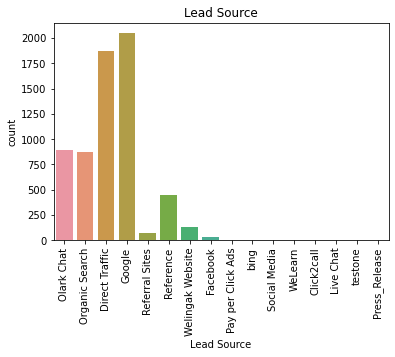

In [47]:
sns.countplot(leads['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

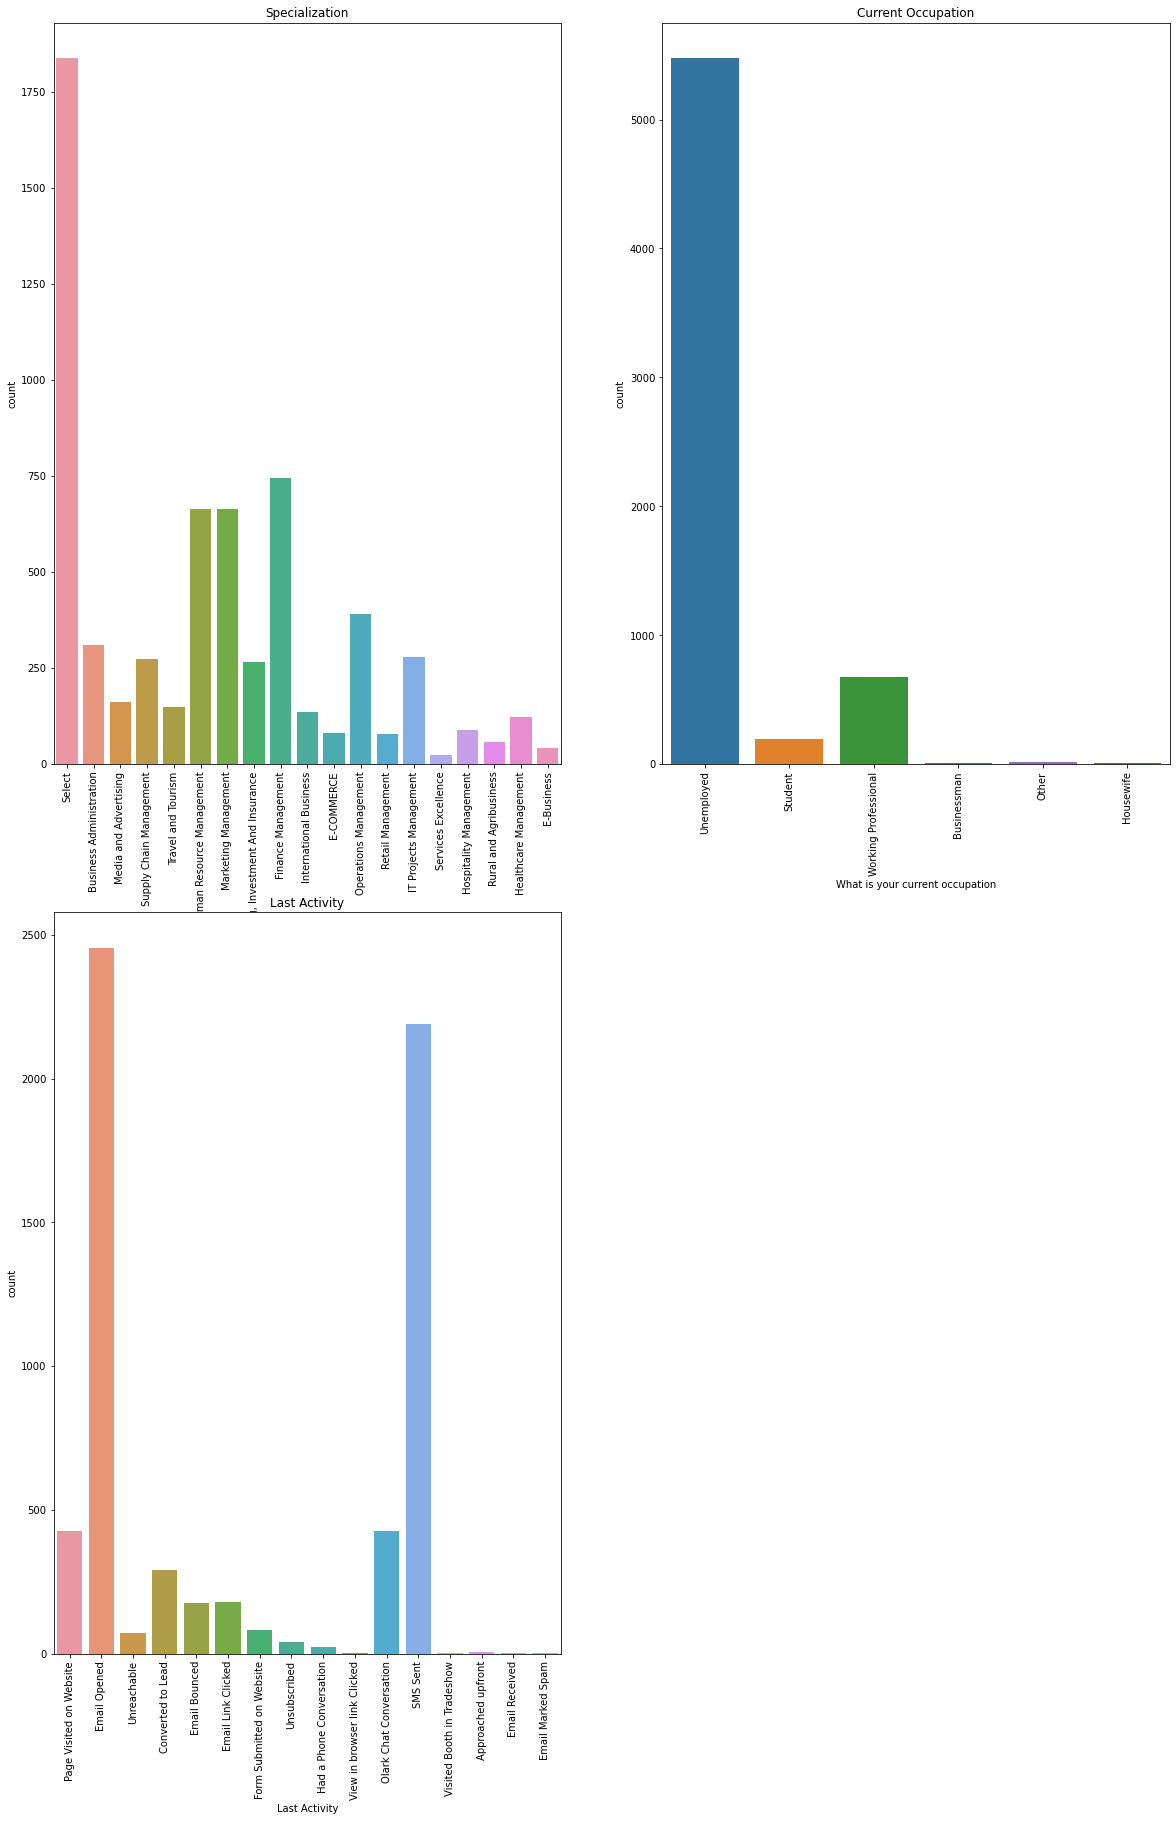

In [48]:
plt.figure(figsize = (20,30))

plt.subplot(2,2,1)
sns.countplot(leads['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(2,2,2)
sns.countplot(leads['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(2,2,3)
sns.countplot(leads['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

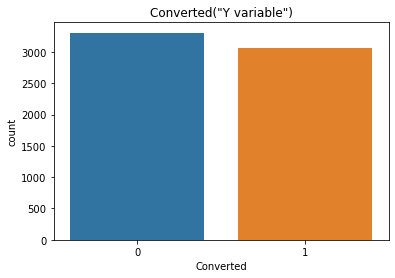

In [49]:
sns.countplot(leads['Converted'])
plt.title('Converted("Y variable")')
plt.show()

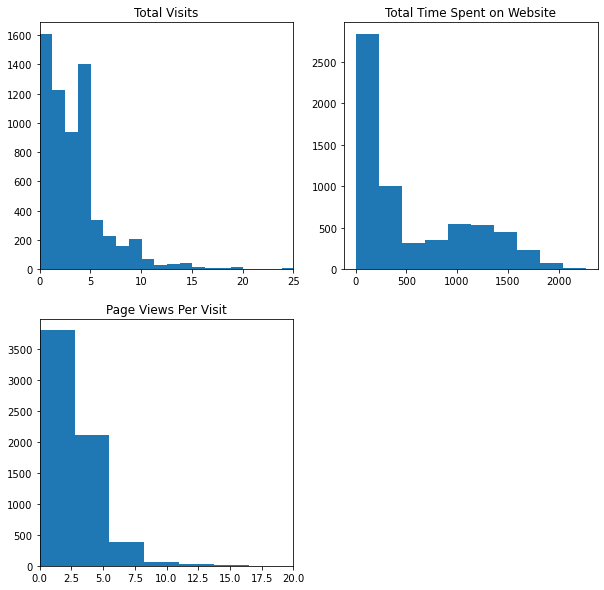

In [50]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

Binary variables Convertion to assess the relationship correctly

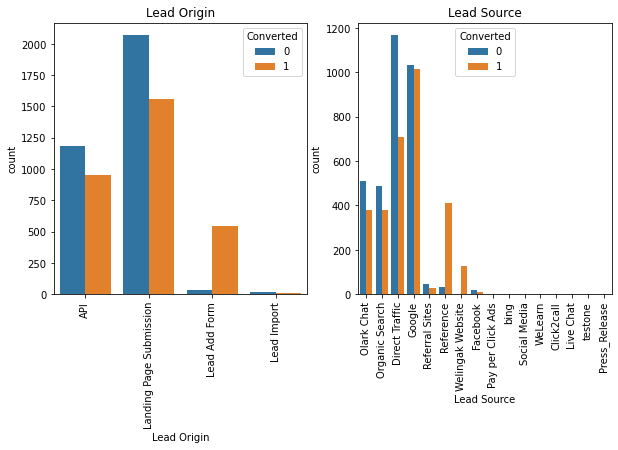

In [51]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

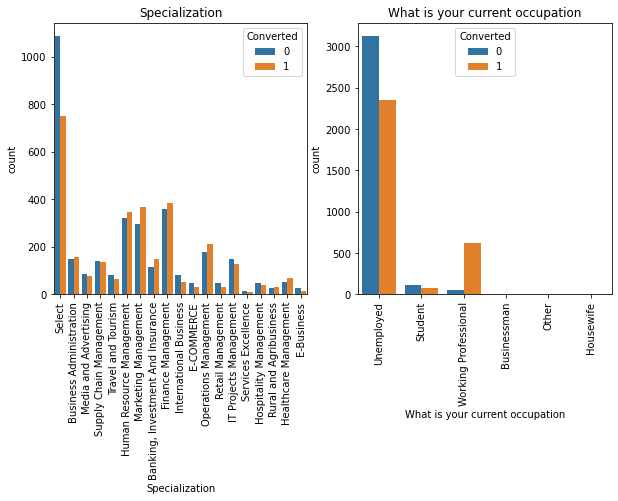

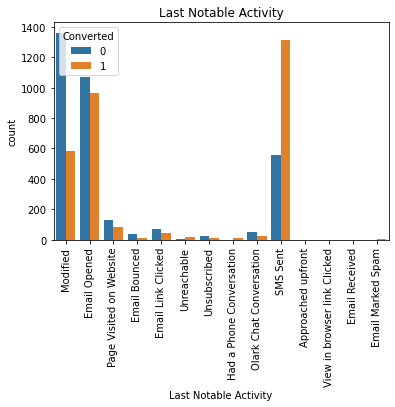

In [52]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

sns.countplot(x='Last Notable Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

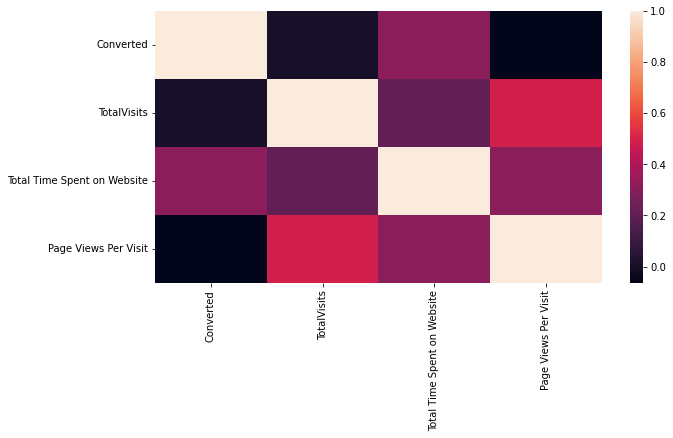

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr())
plt.show()

In [54]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

###### Dummy variable creation

There are 8 categorical variables in the data frame. Dummy variables are to be created for these categories  

In [55]:
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [56]:
leads = pd.concat([leads, dummy], axis=1)

In [57]:
## Separating the value 'select' from the variable 'Specialization' and creating a separate dummy variable 

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [58]:
##Dropping the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity', 'Specialization'], axis=1)

In [59]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
leads.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last 

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
y = leads['Converted']
X = leads.drop('Converted', axis=1)

###### Test-train split and scaling

Data splitting for model training 80-20

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=100)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5098 entries, 4719 to 8217
Data columns (total 74 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           5098 non-null   float64
 1   Total Time Spent on Website                           5098 non-null   int64  
 2   Page Views Per Visit                                  5098 non-null   float64
 3   Lead Origin_Landing Page Submission                   5098 non-null   uint8  
 4   Lead Origin_Lead Add Form                             5098 non-null   uint8  
 5   Lead Origin_Lead Import                               5098 non-null   uint8  
 6   Lead Source_Direct Traffic                            5098 non-null   uint8  
 7   Lead Source_Facebook                                  5098 non-null   uint8  
 8   Lead Source_Google                                    5

In [64]:
#data processing using StandardScaler 

#TotalVisits                                         5098 non-null   float64
#Total Time Spent on Website                         5098 non-null   int64  
#Page Views Per Visit                                5098 non-null   float64

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4719,0.261194,1.601468,0.021340,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4453,-0.309804,1.848085,-0.222350,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5770,-0.690470,-0.946316,-1.197114,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1774,-0.119471,1.296302,0.265031,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,-0.309804,1.303399,-0.222350,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
X_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
TotalVisits,1.000000,0.191755,0.451938,0.262355,-0.205544,-0.038555,0.070017,-0.038555,0.083627,-0.013679,...,0.019207,0.031061,-0.003455,0.038031,0.013775,0.007399,0.075856,0.021330,0.076130,0.056947
Total Time Spent on Website,0.191755,1.000000,0.324891,0.275559,-0.253019,-0.058966,0.113699,-0.058966,0.230236,-0.018747,...,0.020797,0.014421,0.052396,0.044263,0.050664,0.027816,0.018266,0.000909,0.037263,0.043903
Page Views Per Visit,0.451938,0.324891,1.000000,0.483297,-0.361320,-0.062894,0.104358,-0.062894,0.202018,-0.023716,...,0.054674,0.066521,0.017688,0.069725,0.040189,0.025028,0.029142,0.019708,0.054702,0.110578
Lead Origin_Landing Page Submission,0.262355,0.275559,0.483297,1.000000,-0.365636,-0.072260,0.503518,-0.072260,0.081022,-0.022810,...,0.141587,0.095978,0.082427,0.099266,0.097738,0.071834,0.053544,0.041648,0.100626,0.092282
Lead Origin_Lead Add Form,-0.205544,-0.253019,-0.361320,-0.365636,1.000000,-0.019929,-0.204168,-0.019929,-0.215660,0.062385,...,-0.039758,-0.041311,0.020819,-0.041553,-0.026519,-0.025782,-0.023111,-0.017818,-0.025900,-0.044590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,0.007399,0.027816,0.025028,0.071834,-0.025782,-0.007405,0.020481,-0.007405,0.020625,-0.002338,...,-0.025706,-0.018630,-0.039809,-0.018707,-0.029971,1.000000,-0.011259,-0.006621,-0.023905,-0.018241
Specialization_Rural and Agribusiness,0.075856,0.018266,0.029142,0.053544,-0.023111,-0.005988,0.029853,-0.005988,-0.034076,-0.001890,...,-0.020788,-0.015066,-0.032194,-0.015128,-0.024238,-0.011259,1.000000,-0.005354,-0.019332,-0.014752
Specialization_Services Excellence,0.021330,0.000909,0.019708,0.041648,-0.017818,-0.003521,0.048726,-0.003521,-0.030837,-0.001112,...,-0.012224,-0.008859,-0.018931,-0.008896,-0.014253,-0.006621,-0.005354,1.000000,-0.011368,-0.008675
Specialization_Supply Chain Management,0.076130,0.037263,0.054702,0.100626,-0.025900,0.003410,0.078026,0.003410,-0.017371,-0.004014,...,-0.044138,-0.031988,-0.068354,-0.032120,-0.051462,-0.023905,-0.019332,-0.011368,1.000000,-0.031321


#### Model Building

Feature selection using RFE (Coarse Tuning)

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()

rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [69]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [70]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 45),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 47),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 57),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 58),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Live Chat', False, 48),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Pay per Click Ads', False, 40),
 ('Lead Source_Press_Release', False, 56),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Social Media', False, 52),
 ('Lead Source_WeLearn', False, 39),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_testone', False, 36),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 21),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link

In [71]:
# RFE selected columns grouped as one
group = X_train.columns[rfe.support_]
group

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

Manual feature elimination (using p-values and VIFs)

In [72]:
import statsmodels.api as sm

In [73]:
### First iteration

X_train_sm = sm.add_constant(X_train[group])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5082
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2322.9
Date:                Mon, 18 Sep 2023   Deviance:                       4645.9
Time:                        18:55:58   Pearson chi2:                 5.26e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3771
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6758      0.600      1.126      0.260      -0.500       1.852
Total Time Spent on Website                              1.1157      0.044     25.552      0.000       1.030       1.201
Lead Origin_Lead Add Form                                2.8441      1.226      2.320      0.020       0.441       5.247
Lead Source_Olark Chat                                   1.3403      0.107     12.483      0.000       1.130       1.551
Lead Source_Reference                                    1.1373      1.245      0.914      0.361      -1.302       3.577
Lead Source_Welingak Website                             3.3398      1.585      2.107      0.035       0.233       6.447
Do Not Email_Yes                                        -1.3313      0.179     -7.436      0.000      -1.682      -0.980
Last Activity_Had a Phone Conversation                   1.7271      0.968      1.784      0.074      -0.170       3.624
Last Activity_SMS Sent                                   1.0525      0.079     13.309      0.000       0.898       1.208
What is your current occupation_Housewife               22.4124   2.39e+04      0.001      0.999   -4.68e+04    4.69e+04
What is your current occupation_Student                 -1.3299      0.632     -2.105      0.035      -2.568      -0.091
What is your current occupation_Unemployed              -1.5018      0.601     -2.499      0.012      -2.680      -0.324
What is your current occupation_Working Professional     1.0681      0.625      1.708      0.088      -0.157       2.294
Last Notable Activity_Had a Phone Conversation          22.2182   1.84e+04      0.001      0.999   -3.61e+04    3.61e+04
Last Notable Activity_Modified                          -0.8739      0.084    -10.375      0.000      -1.039      -0.709
Last Notable Activity_Unreachable                        2.6378      0.796      3.313      0.001       1.077       4.198
========================================================================================================================
"""

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train[group].columns
vif['VIF'] = [variance_inflation_factor(X_train[group].values, i) for i in range(X_train[group].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,Lead Origin_Lead Add Form,93.55
3,Lead Source_Reference,72.99
4,Lead Source_Welingak Website,21.63
6,Last Activity_Had a Phone Conversation,2.52
12,Last Notable Activity_Had a Phone Conversation,2.51
10,What is your current occupation_Unemployed,2.44
7,Last Activity_SMS Sent,1.68
13,Last Notable Activity_Modified,1.57
2,Lead Source_Olark Chat,1.38
11,What is your current occupation_Working Profes...,1.31


Assessing multicollinearity in the model,  
1	Lead Origin_Lead Add Form	93.55
3	Lead Source_Reference	72.99
4	Lead Source_Welingak Website	21.63

three variables show high VIF. 
Further, 'Lead Source_Reference' is also showing high p-value, hence it is dropped

In [76]:
group = group.drop('Lead Source_Reference', 1)

In [77]:
#second iteration

In [78]:
X_train_sm = sm.add_constant(X_train[group])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5083
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2323.3
Date:                Mon, 18 Sep 2023   Deviance:                       4646.6
Time:                        18:55:59   Pearson chi2:                 5.25e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3771
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6764      0.600      1.128      0.260      -0.499       1.852
Total Time Spent on Website                              1.1157      0.044     25.550      0.000       1.030       1.201
Lead Origin_Lead Add Form                                3.9530      0.230     17.155      0.000       3.501       4.405
Lead Source_Olark Chat                                   1.3402      0.107     12.482      0.000       1.130       1.551
Lead Source_Welingak Website                             2.2307      1.031      2.164      0.030       0.210       4.251
Do Not Email_Yes                                        -1.3301      0.179     -7.434      0.000      -1.681      -0.979
Last Activity_Had a Phone Conversation                   1.7286      0.968      1.787      0.074      -0.168       3.625
Last Activity_SMS Sent                                   1.0526      0.079     13.311      0.000       0.898       1.208
What is your current occupation_Housewife               22.4135   2.39e+04      0.001      0.999   -4.68e+04    4.69e+04
What is your current occupation_Student                 -1.3296      0.632     -2.104      0.035      -2.568      -0.091
What is your current occupation_Unemployed              -1.5025      0.601     -2.500      0.012      -2.680      -0.325
What is your current occupation_Working Professional     1.0683      0.625      1.709      0.087      -0.157       2.294
Last Notable Activity_Had a Phone Conversation          22.2169   1.84e+04      0.001      0.999   -3.61e+04    3.61e+04
Last Notable Activity_Modified                          -0.8740      0.084    -10.378      0.000      -1.039      -0.709
Last Notable Activity_Unreachable                        2.6381      0.796      3.313      0.001       1.078       4.199
========================================================================================================================
"""

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train[group].columns
vif['VIF'] = [variance_inflation_factor(X_train[group].values, i) for i in range(X_train[group].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,Last Activity_Had a Phone Conversation,2.52
11,Last Notable Activity_Had a Phone Conversation,2.51
9,What is your current occupation_Unemployed,2.44
6,Last Activity_SMS Sent,1.68
1,Lead Origin_Lead Add Form,1.64
12,Last Notable Activity_Modified,1.57
2,Lead Source_Olark Chat,1.38
3,Lead Source_Welingak Website,1.31
10,What is your current occupation_Working Profes...,1.31
0,Total Time Spent on Website,1.28


Second iteration shows low multicollinearity but high p-values for 'What is your current occupation_Housewife' 
and 'Last Notable Activity_Had a Phone Conversation'. 
Dropping 'What is your current occupation_Housewife' for the next iteration 

In [80]:
group = group.drop('What is your current occupation_Housewife', 1)

In [81]:
### Third iteration

In [82]:
X_train_sm = sm.add_constant(X_train[group])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5084
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2325.3
Date:                Mon, 18 Sep 2023   Deviance:                       4650.6
Time:                        18:55:59   Pearson chi2:                 5.25e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3766
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1995      0.552      2.171      0.030       0.117       2.282
Total Time Spent on Website                              1.1153      0.044     25.545      0.000       1.030       1.201
Lead Origin_Lead Add Form                                3.9527      0.230     17.157      0.000       3.501       4.404
Lead Source_Olark Chat                                   1.3389      0.107     12.469      0.000       1.128       1.549
Lead Source_Welingak Website                             2.2307      1.031      2.164      0.030       0.210       4.251
Do Not Email_Yes                                        -1.3334      0.179     -7.444      0.000      -1.685      -0.982
Last Activity_Had a Phone Conversation                   1.7274      0.967      1.785      0.074      -0.169       3.624
Last Activity_SMS Sent                                   1.0529      0.079     13.315      0.000       0.898       1.208
What is your current occupation_Student                 -1.8526      0.587     -3.156      0.002      -3.003      -0.702
What is your current occupation_Unemployed              -2.0256      0.554     -3.659      0.000      -3.111      -0.940
What is your current occupation_Working Professional     0.5450      0.580      0.940      0.347      -0.591       1.681
Last Notable Activity_Had a Phone Conversation          22.2181   1.84e+04      0.001      0.999   -3.61e+04    3.61e+04
Last Notable Activity_Modified                          -0.8727      0.084    -10.370      0.000      -1.038      -0.708
Last Notable Activity_Unreachable                        2.6369      0.796      3.311      0.001       1.076       4.198
========================================================================================================================
"""

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train[group].columns
vif['VIF'] = [variance_inflation_factor(X_train[group].values, i) for i in range(X_train[group].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,Last Activity_Had a Phone Conversation,2.52
10,Last Notable Activity_Had a Phone Conversation,2.51
8,What is your current occupation_Unemployed,2.44
6,Last Activity_SMS Sent,1.68
1,Lead Origin_Lead Add Form,1.63
11,Last Notable Activity_Modified,1.57
2,Lead Source_Olark Chat,1.38
3,Lead Source_Welingak Website,1.31
9,What is your current occupation_Working Profes...,1.31
0,Total Time Spent on Website,1.28


Dropping 'Last Notable Activity_Had a Phone Conversation' for the next iteration

In [84]:
group = group.drop('Last Notable Activity_Had a Phone Conversation', 1)

In [85]:
# Fourth iteration

In [86]:
X_train_sm = sm.add_constant(X_train[group])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5085
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2327.3
Date:                Mon, 18 Sep 2023   Deviance:                       4654.6
Time:                        18:56:00   Pearson chi2:                 5.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3761
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2026      0.552      2.177      0.029       0.120       2.285
Total Time Spent on Website                              1.1142      0.044     25.527      0.000       1.029       1.200
Lead Origin_Lead Add Form                                3.9507      0.230     17.143      0.000       3.499       4.402
Lead Source_Olark Chat                                   1.3378      0.107     12.459      0.000       1.127       1.548
Lead Source_Welingak Website                             2.2316      1.031      2.165      0.030       0.211       4.252
Do Not Email_Yes                                        -1.3332      0.179     -7.443      0.000      -1.684      -0.982
Last Activity_Had a Phone Conversation                   2.9840      0.793      3.763      0.000       1.430       4.538
Last Activity_SMS Sent                                   1.0513      0.079     13.298      0.000       0.896       1.206
What is your current occupation_Student                 -1.8531      0.587     -3.157      0.002      -3.004      -0.703
What is your current occupation_Unemployed              -2.0258      0.554     -3.659      0.000      -3.111      -0.941
What is your current occupation_Working Professional     0.5439      0.580      0.938      0.348      -0.592       1.680
Last Notable Activity_Modified                          -0.8804      0.084    -10.471      0.000      -1.045      -0.716
Last Notable Activity_Unreachable                        2.6336      0.796      3.307      0.001       1.073       4.194
========================================================================================================================
"""

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[group].columns
vif['VIF'] = [variance_inflation_factor(X_train[group].values, i) for i in range(X_train[group].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.44
6,Last Activity_SMS Sent,1.68
1,Lead Origin_Lead Add Form,1.63
10,Last Notable Activity_Modified,1.56
2,Lead Source_Olark Chat,1.38
3,Lead Source_Welingak Website,1.31
9,What is your current occupation_Working Profes...,1.31
0,Total Time Spent on Website,1.28
4,Do Not Email_Yes,1.09
7,What is your current occupation_Student,1.05


Dropping 'What is your current occupation_Working Professional' for the next iteration

In [88]:
group = group.drop('What is your current occupation_Working Professional', 1)

In [89]:
#Fifth iteration

In [90]:
X_train_sm = sm.add_constant(X_train[group])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5086
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2327.7
Date:                Mon, 18 Sep 2023   Deviance:                       4655.4
Time:                        18:56:00   Pearson chi2:                 5.24e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3760
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.6999      0.174      9.790      0.000       1.360       2.040
Total Time Spent on Website                    1.1143      0.044     25.526      0.000       1.029       1.200
Lead Origin_Lead Add Form                      3.9519      0.230     17.149      0.000       3.500       4.404
Lead Source_Olark Chat                         1.3391      0.107     12.472      0.000       1.129       1.550
Lead Source_Welingak Website                   2.2304      1.031      2.163      0.031       0.210       4.251
Do Not Email_Yes                              -1.3327      0.179     -7.439      0.000      -1.684      -0.982
Last Activity_Had a Phone Conversation         2.9859      0.793      3.765      0.000       1.432       4.540
Last Activity_SMS Sent                         1.0536      0.079     13.341      0.000       0.899       1.208
What is your current occupation_Student       -2.3512      0.262     -8.977      0.000      -2.864      -1.838
What is your current occupation_Unemployed    -2.5242      0.174    -14.544      0.000      -2.864      -2.184
Last Notable Activity_Modified                -0.8804      0.084    -10.471      0.000      -1.045      -0.716
Last Notable Activity_Unreachable              2.6347      0.796      3.309      0.001       1.074       4.195
==============================================================================================================
"""

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train[group].columns
vif['VIF'] = [variance_inflation_factor(X_train[group].values, i) for i in range(X_train[group].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
8,What is your current occupation_Unemployed,2.20
6,Last Activity_SMS Sent,1.51
1,Lead Origin_Lead Add Form,1.49
9,Last Notable Activity_Modified,1.49
2,Lead Source_Olark Chat,1.35
3,Lead Source_Welingak Website,1.29
0,Total Time Spent on Website,1.24
4,Do Not Email_Yes,1.09
7,What is your current occupation_Student,1.04
5,Last Activity_Had a Phone Conversation,1.01


Considering the p-values and VIF values, fifth itertion is the finalized model for logistic regression 

#### Model Evaluation: 

Sensitivity and Specificity

In [92]:
group

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [93]:
X_train = X_train[group]

In [94]:
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

4719    0.723185
4453    0.907944
5770    0.194638
1774    0.905851
403     0.652073
5171    0.142851
6263    0.100487
1475    0.954248
7133    0.194638
1662    0.177294
dtype: float64

In [95]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72318482, 0.90794362, 0.19463768, 0.90585114, 0.65207252,
       0.14285089, 0.10048713, 0.95424779, 0.19463768, 0.17729432])

In [96]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.723185
1,1,0.907944
2,0,0.194638
3,1,0.905851
4,0,0.652073


In [97]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [98]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.723185,1
1,1,0.907944,1
2,0,0.194638,0
3,1,0.905851,1
4,0,0.652073,1


In [99]:
#New dataframe created with the predicted probabilities. This data frame is used for evaluation.

In [100]:
from sklearn import metrics

In [101]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2219  430]
 [ 639 1810]]


In [102]:
print((metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))*100)

79.03099254609651


In [103]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [104]:
TP/(TP+FN)*100

73.90771743568804

In [105]:
TN/(TN+FP)*100

83.76745941864854

Sensitivity is 73.9% and specificity is 83.8% for the 0.5 probabiliy cutoff; This indicates that the model is reasonably good at distinguishing positive and negative cases.

Optimal cut-off using ROC curve

In [106]:
#plotting an ROC curve and calculating the AUC

In [107]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

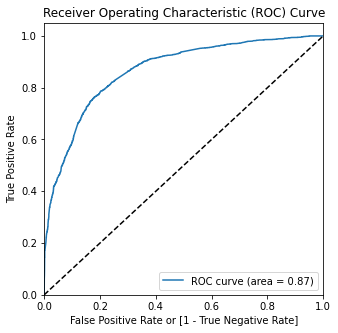

In [109]:
import matplotlib.pyplot as plt

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [110]:
#Finding the optimal cutoff point with creating various probability cutoffs 

In [111]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.723185,1,1,1,1,1,1,1,1,1,0,0
1,1,0.907944,1,1,1,1,1,1,1,1,1,1,1
2,0,0.194638,0,1,1,0,0,0,0,0,0,0,0
3,1,0.905851,1,1,1,1,1,1,1,1,1,1,1
4,0,0.652073,1,1,1,1,1,1,1,1,0,0,0


In [112]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.480384  1.000000  0.000000
0.1   0.1  0.576697  0.985708  0.198565
0.2   0.2  0.715182  0.936301  0.510759
0.3   0.3  0.766183  0.901184  0.641374
0.4   0.4  0.787956  0.808493  0.768969
0.5   0.5  0.790310  0.739077  0.837675
0.6   0.6  0.776187  0.672519  0.872027
0.7   0.7  0.741467  0.553287  0.915440
0.8   0.8  0.710475  0.447530  0.953567
0.9   0.9  0.650647  0.289098  0.984900


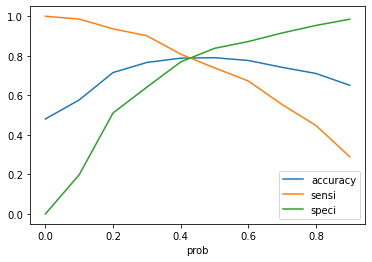

In [113]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [114]:
#optimal cutoff is seen to be at 0.42


In [115]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.723185,1,1,1,1,1,1,1,1,1,0,0,1
1,1,0.907944,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.194638,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.905851,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.652073,1,1,1,1,1,1,1,1,0,0,0,1


In [116]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7899176147508827

In [117]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[2219  430]
 [ 639 1810]]


In [118]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [119]:
TP/(TP+FN)

0.7880767660269498

In [120]:
TN/(TN+FP)

0.7916194790486977

Sensitivity and specificity is 0.7 for the 0.42 probabiliy cutoff; This indicates that the model is reasonably good 
at distinguishing positive and negative cases.

In [121]:
### Testing on the test set

In [122]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [123]:
group


Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [124]:
X_test = X_test[group]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4771,-0.946316,1,0,0,0,0,1,0,0,0,0
6122,-0.829217,0,0,0,0,0,0,0,1,0,0
9202,0.733873,0,0,0,0,0,1,0,1,0,0
6570,0.581290,0,0,0,1,0,1,0,1,0,0
2668,0.646936,0,0,0,0,0,1,0,1,1,0


In [125]:
X_test_sm = sm.add_constant(X_test[group])

In [126]:
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4771,1.0,-0.946316,1,0,0,0,0,1,0,0,0,0
6122,1.0,-0.829217,0,0,0,0,0,0,0,1,0,0
9202,1.0,0.733873,0,0,0,0,0,1,0,1,0,0
6570,1.0,0.581290,0,0,0,1,0,1,0,1,0,0
2668,1.0,0.646936,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4818,1.0,-0.937445,0,0,0,0,0,0,0,1,0,0
8885,1.0,1.431143,0,0,0,0,0,0,0,1,1,0
4786,1.0,-0.946316,1,0,0,0,0,1,0,0,0,0
6702,1.0,1.106460,0,0,0,0,0,0,0,1,0,0


In [127]:
X_test.columns

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [128]:
y_test_pred = res.predict(sm.add_constant(X_test))

y_test_pred[:10]

4771    0.996498
6122    0.148260
9202    0.740229
6570    0.388044
2668    0.517452
4233    0.846247
3368    0.783895
9091    0.487013
5972    0.172615
3631    0.809465
dtype: float64

In [129]:
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
4771,0.996498
6122,0.148260
9202,0.740229
6570,0.388044
2668,0.517452


In [130]:
#creating new test data frame

In [131]:
y_test_df = pd.DataFrame(y_test)

In [132]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [133]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,0
0,1,0.996498
1,0,0.148260
2,0,0.740229
3,1,0.388044
4,1,0.517452


In [134]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [135]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996498
1,0,0.148260
2,0,0.740229
3,1,0.388044
4,1,0.517452


In [136]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [137]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996498,1
1,0,0.148260,0
2,0,0.740229,1
3,1,0.388044,0
4,1,0.517452,1


In [138]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7803921568627451

In [139]:
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[515, 144],
       [136, 480]], dtype=int64)

In [140]:
TP = confusion3[1,1] 
TN = confusion3[0,0] 
FP = confusion3[0,1] 
FN = confusion3[1,0] 

In [141]:
TP / float(TP+FN)

0.7792207792207793

In [142]:
TN / float(TN+FP)

0.7814871016691958

###### Precision and Recall 

In [143]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2219,  430],
       [ 639, 1810]], dtype=int64)

In [144]:
#Precision view

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8080357142857143

In [145]:
#Recall view

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7390771743568804

In [146]:
from sklearn.metrics import precision_recall_curve

In [147]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       0
 3       1
 4       0
        ..
 5093    1
 5094    0
 5095    0
 5096    0
 5097    0
 Name: Converted, Length: 5098, dtype: int64,
 0       1
 1       1
 2       0
 3       1
 4       1
        ..
 5093    1
 5094    1
 5095    1
 5096    0
 5097    0
 Name: Predicted, Length: 5098, dtype: int64)

In [148]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

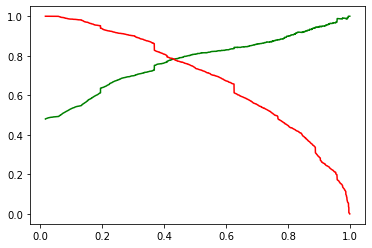

In [149]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [150]:
#Precision-Recall curve shows the optimal cutoff at 0.42

In [151]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.723185,1,1,1,1,1,1,1,1,1,0,0,1
1,1,0.907944,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.194638,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.905851,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.652073,1,1,1,1,1,1,1,1,0,0,0,1


In [152]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7899176147508827

In [153]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2097,  552],
       [ 519, 1930]], dtype=int64)

In [154]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [155]:
TP/(TP+FP)

0.7775987107171636

In [156]:
TP/(TP+FN)

0.7880767660269498

In [157]:
#Evaluation metrics show good specificity and Sensitivity for the model.  


##### Predictions on the test set

In [158]:
y_test_pred = res.predict(sm.add_constant(X_test))

y_test_pred[:10]

4771    0.996498
6122    0.148260
9202    0.740229
6570    0.388044
2668    0.517452
4233    0.846247
3368    0.783895
9091    0.487013
5972    0.172615
3631    0.809465
dtype: float64

In [159]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [160]:
y_pred_1.head()

,0
4771,0.996498
6122,0.148260
9202,0.740229
6570,0.388044
2668,0.517452


In [161]:
y_test_df = pd.DataFrame(y_test)

In [162]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,0
0,1,0.996498
1,0,0.148260
2,0,0.740229
3,1,0.388044
4,1,0.517452


In [164]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996498
1,0,0.148260
2,0,0.740229
3,1,0.388044
4,1,0.517452


In [165]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996498,1
1,0,0.148260,0
2,0,0.740229,1
3,1,0.388044,0
4,1,0.517452,1


In [166]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7803921568627451

In [167]:
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[515, 144],
       [136, 480]], dtype=int64)

In [168]:
TP = confusion3[1,1]  
TN = confusion3[0,0] 
FP = confusion3[0,1] 
FN = confusion3[1,0] 

In [172]:
TP/(TP+FP)

0.7692307692307693

In [170]:
TP/(TP+FN)

0.7792207792207793

Prediction on test set also show good evaluation metrics such as precision being 77% and Recall being 78%. Precision represents the number of correctly predicted positive instances and Recall represents model's ability to correctly identify all the positive instances in the dataset.    

Considering the test data prediction results, we finaliza the fifth itertion model as the final model to be presented to the client for improving the conversion rate. 

In [173]:
X_train_sm = sm.add_constant(X_train[group])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5098
Model:                            GLM   Df Residuals:                     5086
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2327.7
Date:                Mon, 18 Sep 2023   Deviance:                       4655.4
Time:                        19:20:51   Pearson chi2:                 5.24e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3760
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.6999      0.174      9.790      0.000       1.360       2.040
Total Time Spent on Website                    1.1143      0.044     25.526      0.000       1.029       1.200
Lead Origin_Lead Add Form                      3.9519      0.230     17.149      0.000       3.500       4.404
Lead Source_Olark Chat                         1.3391      0.107     12.472      0.000       1.129       1.550
Lead Source_Welingak Website                   2.2304      1.031      2.163      0.031       0.210       4.251
Do Not Email_Yes                              -1.3327      0.179     -7.439      0.000      -1.684      -0.982
Last Activity_Had a Phone Conversation         2.9859      0.793      3.765      0.000       1.432       4.540
Last Activity_SMS Sent                         1.0536      0.079     13.341      0.000       0.899       1.208
What is your current occupation_Student       -2.3512      0.262     -8.977      0.000      -2.864      -1.838
What is your current occupation_Unemployed    -2.5242      0.174    -14.544      0.000      -2.864      -2.184
Last Notable Activity_Modified                -0.8804      0.084    -10.471      0.000      -1.045      -0.716
Last Notable Activity_Unreachable              2.6347      0.796      3.309      0.001       1.074       4.195
==============================================================================================================
"""

In [174]:
vif = pd.DataFrame()
vif['Features'] = X_train[group].columns
vif['VIF'] = [variance_inflation_factor(X_train[group].values, i) for i in range(X_train[group].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
8,What is your current occupation_Unemployed,2.20
6,Last Activity_SMS Sent,1.51
1,Lead Origin_Lead Add Form,1.49
9,Last Notable Activity_Modified,1.49
2,Lead Source_Olark Chat,1.35
3,Lead Source_Welingak Website,1.29
0,Total Time Spent on Website,1.24
4,Do Not Email_Yes,1.09
7,What is your current occupation_Student,1.04
5,Last Activity_Had a Phone Conversation,1.01


The key variables are presented as below:

Lead Origin_Lead Add Form -->Coefficient:  3.9519
Last Activity_Had a Phone Conversation -->Coefficient:  2.9859
Last Notable Activity_Unreachable -->Coefficient:  2.6347
Lead Source_Welingak Website -->Coefficient:  2.2304
Lead Source_Olark Chat -->Coefficient:  1.3391
Total Time Spent on Website -->Coefficient:  1.1143
Last Activity_SMS Sent -->Coefficient:  1.0536
Last Notable Activity_Modified -->Coefficient:  -0.8804
Do Not Email_Yes -->Coefficient:  -1.3327
What is your current occupation_Student -->Coefficient:  -2.3512
What is your current occupation_Unemployed -->Coefficient:  -2.5242

The coefficients, along with their signs (positive or negative), indicate how each predictor variable influences the probability of conversion.